In [1]:
#Required libraries:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import datetime
from pandasql import sqldf

In [2]:
#Loading the Dataframe:
dfnet = pd.read_csv(r'C:\Users\Public\netflix_titles_nov_2019.csv')

In [3]:
#Dataframe Information:
dfnet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5837 entries, 0 to 5836
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       5837 non-null   int64 
 1   title         5837 non-null   object
 2   director      3936 non-null   object
 3   cast          5281 non-null   object
 4   country       5410 non-null   object
 5   date_added    5195 non-null   object
 6   release_year  5837 non-null   int64 
 7   rating        5827 non-null   object
 8   duration      5837 non-null   object
 9   listed_in     5837 non-null   object
 10  description   5837 non-null   object
 11  type          5837 non-null   object
dtypes: int64(2), object(10)
memory usage: 547.3+ KB


In [4]:
#Displaying 6 records:
dfnet.head(6)

,show_id,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,type
0,81193313,Chocolate,NaN,"Ha Ji-won, Yoon Kye-sang, Jang Seung-jo, Kang ...",South Korea,"November 30, 2019",2019,TV-14,1 Season,"International TV Shows, Korean TV Shows, Roman...",Brought together by meaningful meals in the pa...,TV Show
1,81197050,Guatemala: Heart of the Mayan World,"Luis Ara, Ignacio Jaunsolo",Christian Morales,NaN,"November 30, 2019",2019,TV-G,67 min,"Documentaries, International Movies","From Sierra de las Minas to Esquipulas, explor...",Movie
2,81213894,The Zoya Factor,Abhishek Sharma,"Sonam Kapoor, Dulquer Salmaan, Sanjay Kapoor, ...",India,"November 30, 2019",2019,TV-14,135 min,"Comedies, Dramas, International Movies",A goofy copywriter unwittingly convinces the I...,Movie
3,81082007,Atlantics,Mati Diop,"Mama Sane, Amadou Mbow, Ibrahima Traore, Nicol...","France, Senegal, Belgium","November 29, 2019",2019,TV-14,106 min,"Dramas, Independent Movies, International Movies","Arranged to marry a rich man, young Ada is cru...",Movie
4,80213643,Chip and Potato,NaN,"Abigail Oliver, Andrea Libman, Briana Buckmast...","Canada, United Kingdom",NaN,2019,TV-Y,2 Seasons,Kids' TV,"Lovable pug Chip starts kindergarten, makes ne...",TV Show
5,81172754,Crazy people,Moses Inwang,"Ramsey Nouah, Chigul, Sola Sobowale, Ireti Doy...",Nigeria,"November 29, 2019",2018,TV-14,107 min,"Comedies, International Movies, Thrillers",Nollywood star Ramsey Nouah learns that someon...,Movie


In [5]:
#Cleaning the data
df_net = dfnet.drop_duplicates()
dff_net =df_net.dropna()

In [6]:
#Dataframe Describe:
dff_net.describe()

,show_id,release_year
count,3.447000e+03,3447.000000
mean,7.599440e+07,2012.572962
std,1.180951e+07,9.114564
min,2.698800e+05,1942.000000
25%,7.030419e+07,2012.000000
50%,8.015418e+07,2016.000000
75%,8.023963e+07,2017.000000
max,8.122720e+07,2019.000000


In [15]:
for i in dff_net.index:
    if dff_net.loc[i,'rating']=='UR':
        dff_net.loc[i,'rating']='NR'

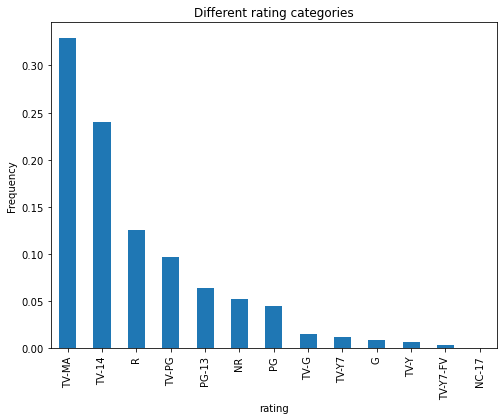

In [14]:
plt.figure(figsize=(8,6))
dff_net['rating'].value_counts(normalize=True).plot.bar()
plt.title('Different rating categories')
plt.xlabel('rating')
plt.ylabel('Frequency')
plt.show()

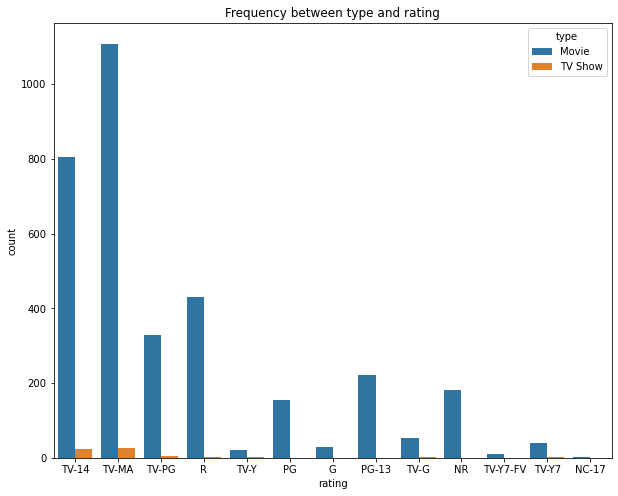

In [9]:
plt.figure(figsize=(10,8))
sns.countplot(x='rating',hue='type',data=dff_net)
plt.title('Frequency between type and rating')
plt.show()

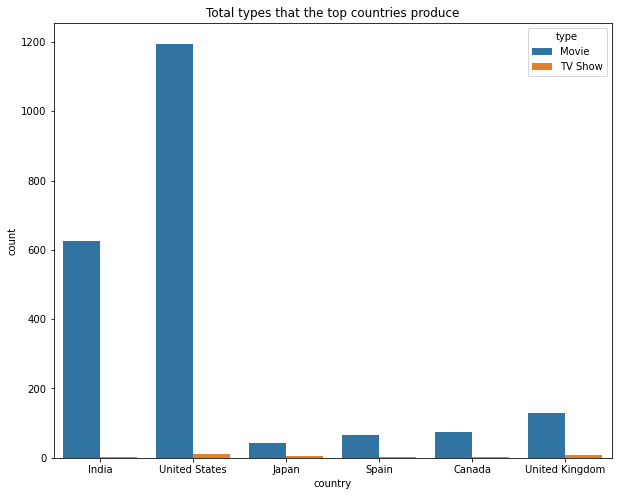

In [10]:
top_productive_countries=dff_net[(dff_net['country']=='United States')|(dff_net['country']=='India')|(dff_net['country']=='United Kingdom')|(dff_net['country']=='Japan')|
                             (dff_net['country']=='Canada')|(dff_net['country']=='Spain')]
plt.figure(figsize=(10,8))
sns.countplot(x='country',hue='type',data=top_productive_countries)
plt.title('Total types that the top countries produce')
plt.show()

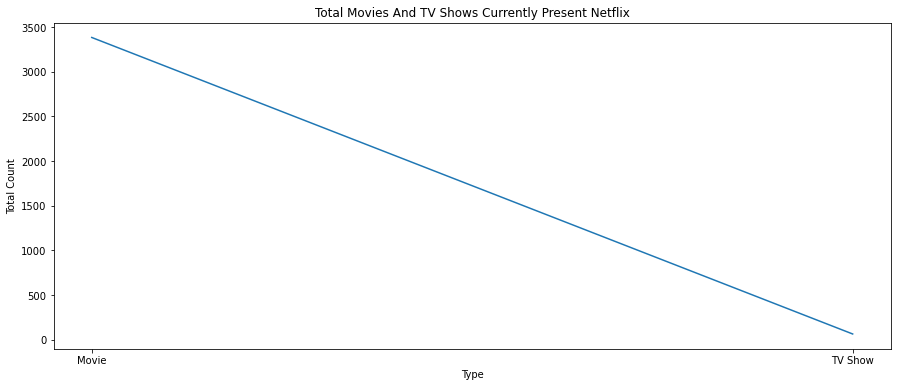

In [11]:
tot_typ = dff_net.groupby(['type'], as_index=False)['release_year'].count()
plt.subplots(figsize=(15,6))
plt.plot(tot_typ.type, tot_typ.release_year)
plt.xlabel('Type')
plt.ylabel('Total Count')
plt.title('Total Movies And TV Shows Currently Present Netflix')
plt.show()

,count,type
0,3384,Movie
1,63,TV Show


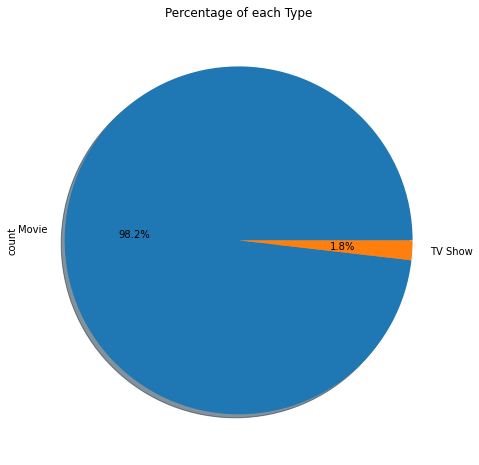

In [12]:
PI = sqldf("select count(*) as count,type from dff_net group by type ")
display(PI)
PI.set_index('type', inplace=True)
plot = PI.plot.pie(y='count', title="Percentage of each Type", legend=False, \
                    autopct='%1.1f%%', explode=None, \
                    shadow=True, startangle=0, figsize=(10,8))

<AxesSubplot:title={'center':'Total Shows Released Ever Year'}, xlabel='release_year'>

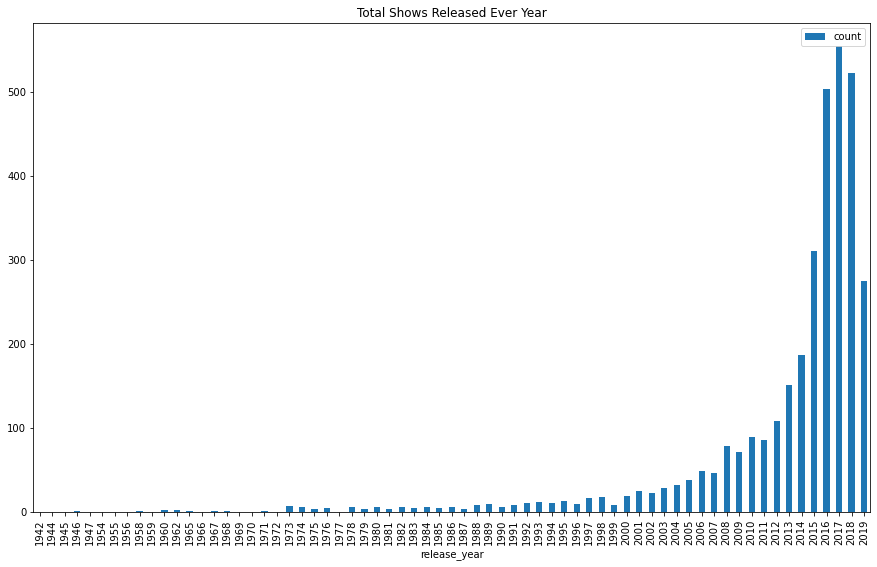

In [13]:
#Bar Graph to find out total show released ever year:
df_BAR = sqldf("select count(*) as count,release_year from dff_net group by release_year ")
df_BAR.plot(x='release_year', y=["count"], kind='bar',figsize=(15, 9),title = 'Total Shows Released Ever Year')